# Do do

In [1]:
# select a GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = 'PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"] = '8'

import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy
from scipy.io import savemat,loadmat
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import tensorflow
print('Tensorflow version = ',tensorflow.__version__)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, History
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from darknet import darknet19_binary
from Utils import cutout,LR_WarmRestart,GetDataGen,plot_history

Tensorflow version =  2.3.1


In [3]:
# Dataset
WhichDataSet = 'CIFAR10'
#WhichDataSet = 'CIFAR100'
#load and prepare data
if WhichDataSet == 'CIFAR10':
    (x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
else:
    (x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar100.load_data()
num_classes = np.unique(y_train).shape[0]
K_train = x_train.shape[0]
input_shape = x_train.shape[1:]
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')#/255.0
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
# Learning parameters 
init_lr = 0.1
epochs = 300
batch_size = 125
My_wd=5e-4
UseCutout=True
Loss = 'categorical_crossentropy'
steps_per_epoch = int(np.floor(K_train / batch_size))
lr_fn = PolynomialDecay(initial_learning_rate=0.1, 
                        end_learning_rate=0.0000001,
                        decay_steps=int(steps_per_epoch*epochs), 
                        power=4.0)
Optimizer = SGD(learning_rate=lr_fn,
                momentum=0.9, 
                nesterov=False)
Metrics = ['accuracy']
ModelsPath = 'TrainedModels/Tensorflow.keras/'

In [4]:
def catcross_entropy_logits_loss():
    def loss(y_true, y_pred):
        return tensorflow.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=True)
    return loss

In [5]:
#define a datagen or generating training samples with flip and pad/crop augmentation, and if set to True, with cutout augmentation
dataGenerator = GetDataGen(UseCutout)

#define and compile the model
Temperature=40.0
model = darknet19_binary(input_shape=input_shape)
model.compile(loss=catcross_entropy_logits_loss() ,optimizer = Optimizer, metrics = Metrics)

#print  the model
model.summary()

#define the learnng rate schedule
steps_per_epoch = int(np.floor(K_train / batch_size))
lr_scheduler = LR_WarmRestart(nbatch=steps_per_epoch,
                              initial_lr=init_lr, min_lr=init_lr*1e-4,
                              epochs_restart = [],
                              Tmult=300.0) 

#define callbacks
history = History()
callbacks = [lr_scheduler,history]

TypeError: darknet19_binary() missing 1 required positional argument: 'UseBinaryWeights'

In [6]:
history = model.fit_generator(dataGenerator.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_test, y_test),
                              epochs=epochs,
                              verbose=1,
                              callbacks=callbacks,
                              steps_per_epoch =steps_per_epoch)

Instructions for updating:
Use tf.cast instead.

 Start of Epoch Learning Rate = 0.100000
Epoch 1/300
10000/10000 [==============================] - 8s 786us/sample - loss: 3.9888 - acc: 0.4307

 End of Epoch Learning Rate = 0.099997
400/400 [==============================] - 121s 303ms/step - loss: 4.8895 - acc: 0.2614 - val_loss: 3.9888 - val_acc: 0.4307

 Start of Epoch Learning Rate = 0.099997
Epoch 2/300
10000/10000 [==============================] - 8s 759us/sample - loss: 3.1107 - acc: 0.5132

 End of Epoch Learning Rate = 0.099989
400/400 [==============================] - 118s 294ms/step - loss: 3.5624 - acc: 0.4488 - val_loss: 3.1107 - val_acc: 0.5132

 Start of Epoch Learning Rate = 0.099989
Epoch 3/300
10000/10000 [==============================] - 7s 750us/sample - loss: 2.2573 - acc: 0.6504

 End of Epoch Learning Rate = 0.099975
400/400 [==============================] - 117s 294ms/step - loss: 2.7182 - acc: 0.5582 - val_loss: 2.2573 - val_acc: 0.6504

 Start of Epoch Le

10000/10000 [==============================] - 8s 758us/sample - loss: 0.7809 - acc: 0.8836

 End of Epoch Learning Rate = 0.092769
400/400 [==============================] - 117s 292ms/step - loss: 0.8123 - acc: 0.8670 - val_loss: 0.7809 - val_acc: 0.8836

 Start of Epoch Learning Rate = 0.092769
Epoch 53/300
10000/10000 [==============================] - 7s 736us/sample - loss: 0.8365 - acc: 0.8636

 End of Epoch Learning Rate = 0.092495
400/400 [==============================] - 117s 293ms/step - loss: 0.8137 - acc: 0.8660 - val_loss: 0.8365 - val_acc: 0.8636

 Start of Epoch Learning Rate = 0.092495
Epoch 54/300
10000/10000 [==============================] - 7s 747us/sample - loss: 0.7736 - acc: 0.8873

 End of Epoch Learning Rate = 0.092217
400/400 [==============================] - 117s 294ms/step - loss: 0.8128 - acc: 0.8682 - val_loss: 0.7736 - val_acc: 0.8873

 Start of Epoch Learning Rate = 0.092217
Epoch 55/300
10000/10000 [==============================] - 7s 748us/sample -

10000/10000 [==============================] - 7s 731us/sample - loss: 0.6535 - acc: 0.9066

 End of Epoch Learning Rate = 0.073167
400/400 [==============================] - 117s 292ms/step - loss: 0.6788 - acc: 0.8928 - val_loss: 0.6535 - val_acc: 0.9066

 Start of Epoch Learning Rate = 0.073167
Epoch 105/300
10000/10000 [==============================] - 7s 735us/sample - loss: 0.6589 - acc: 0.9001

 End of Epoch Learning Rate = 0.072702
400/400 [==============================] - 117s 293ms/step - loss: 0.6698 - acc: 0.8932 - val_loss: 0.6589 - val_acc: 0.9001

 Start of Epoch Learning Rate = 0.072702
Epoch 106/300
10000/10000 [==============================] - 7s 733us/sample - loss: 0.6436 - acc: 0.9040

 End of Epoch Learning Rate = 0.072235
400/400 [==============================] - 117s 293ms/step - loss: 0.6637 - acc: 0.8935 - val_loss: 0.6436 - val_acc: 0.9040

 Start of Epoch Learning Rate = 0.072235
Epoch 107/300
10000/10000 [==============================] - 7s 746us/sampl

10000/10000 [==============================] - 7s 739us/sample - loss: 0.4960 - acc: 0.9243

 End of Epoch Learning Rate = 0.046866
400/400 [==============================] - 117s 292ms/step - loss: 0.4876 - acc: 0.9189 - val_loss: 0.4960 - val_acc: 0.9243

 Start of Epoch Learning Rate = 0.046866
Epoch 157/300
10000/10000 [==============================] - 7s 732us/sample - loss: 0.5497 - acc: 0.9078

 End of Epoch Learning Rate = 0.046343
400/400 [==============================] - 117s 293ms/step - loss: 0.4742 - acc: 0.9222 - val_loss: 0.5497 - val_acc: 0.9078

 Start of Epoch Learning Rate = 0.046343
Epoch 158/300
10000/10000 [==============================] - 7s 731us/sample - loss: 0.5321 - acc: 0.9169

 End of Epoch Learning Rate = 0.045822
400/400 [==============================] - 117s 292ms/step - loss: 0.4778 - acc: 0.9205 - val_loss: 0.5321 - val_acc: 0.9169

 Start of Epoch Learning Rate = 0.045822
Epoch 159/300
10000/10000 [==============================] - 7s 728us/sampl

10000/10000 [==============================] - 7s 738us/sample - loss: 0.3500 - acc: 0.9420

 End of Epoch Learning Rate = 0.021472
400/400 [==============================] - 117s 292ms/step - loss: 0.2503 - acc: 0.9583 - val_loss: 0.3500 - val_acc: 0.9420

 Start of Epoch Learning Rate = 0.021472
Epoch 209/300
10000/10000 [==============================] - 7s 749us/sample - loss: 0.3445 - acc: 0.9434

 End of Epoch Learning Rate = 0.021044
400/400 [==============================] - 117s 292ms/step - loss: 0.2476 - acc: 0.9578 - val_loss: 0.3445 - val_acc: 0.9434

 Start of Epoch Learning Rate = 0.021044
Epoch 210/300
10000/10000 [==============================] - 7s 744us/sample - loss: 0.3772 - acc: 0.9323

 End of Epoch Learning Rate = 0.020619
400/400 [==============================] - 118s 294ms/step - loss: 0.2472 - acc: 0.9573 - val_loss: 0.3772 - val_acc: 0.9323

 Start of Epoch Learning Rate = 0.020619
Epoch 211/300
10000/10000 [==============================] - 7s 742us/sampl

10000/10000 [==============================] - 7s 739us/sample - loss: 0.2957 - acc: 0.9516

 End of Epoch Learning Rate = 0.004332
400/400 [==============================] - 117s 292ms/step - loss: 0.0883 - acc: 0.9869 - val_loss: 0.2957 - val_acc: 0.9516

 Start of Epoch Learning Rate = 0.004332
Epoch 261/300
10000/10000 [==============================] - 8s 767us/sample - loss: 0.2482 - acc: 0.9558

 End of Epoch Learning Rate = 0.004122
400/400 [==============================] - 117s 293ms/step - loss: 0.0877 - acc: 0.9872 - val_loss: 0.2482 - val_acc: 0.9558

 Start of Epoch Learning Rate = 0.004122
Epoch 262/300
10000/10000 [==============================] - 8s 752us/sample - loss: 0.2565 - acc: 0.9577

 End of Epoch Learning Rate = 0.003916
400/400 [==============================] - 117s 293ms/step - loss: 0.0863 - acc: 0.9871 - val_loss: 0.2565 - val_acc: 0.9577

 Start of Epoch Learning Rate = 0.003916
Epoch 263/300
10000/10000 [==============================] - 7s 744us/sampl

In [7]:
#get final performance

y_pred = model.predict(x_test)
print('Test accuracy (%):', 100*sum(np.argmax(y_pred,-1)==np.argmax(y_test,-1))/y_test.shape[0])

Test accuracy (%): 96.52


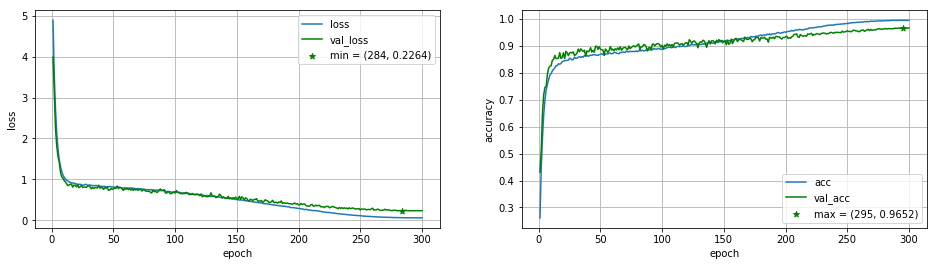

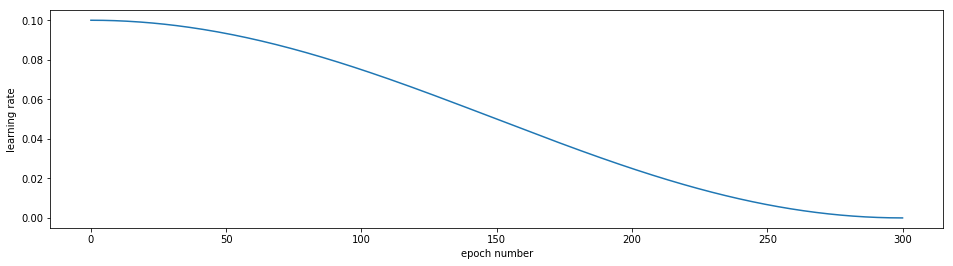

In [8]:
#plot loss and accuracy
plot_history(model.history.history)

#plot learning rate schedule
plt.figure(figsize=(16,4))
plt.plot(np.arange(0,len(lr_scheduler.lr_used))/steps_per_epoch,lr_scheduler.lr_used)
plt.xlabel('epoch number')
plt.ylabel('learning rate')
plt.show()

In [9]:
#save the weigts used for updating
model.save_weights(ModelsPath+'Final_weights_'+WhichDataSet+'_OneBitPerWeight_model_sReLU.h5')